In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt

In [2]:
eda = pd.read_csv('eda_2020_ready_sample10%.csv')
rfm = pd.read_csv('rfm_2020_sample.csv')

In [76]:
eda.head()

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0,1
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0,1
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0,1
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0,2


In [3]:
eda.price.sum()

23356.0302711864

In [4]:
eda.groupby('customer_id')['t_dat'].count().shape[0]

69275

In [5]:
list_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
month_num = [i for i in range(1,10)]
dict_month = dict(zip(list_month, month_num))
dict_month

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9}

## Visualize Data

In [6]:
eda.head()

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0


In [7]:
eda['month'] = pd.to_datetime(eda['t_dat']).dt.month

In [8]:
eda

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0,1
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0,1
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0,1
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0,2
...,...,...,...,...,...,...,...,...
802093,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.033881,Blouse,Ladieswear,ACTIVE,31.0,9
802094,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.016932,Blouse,Ladieswear,ACTIVE,31.0,9
802095,fc9d03ceb03dc98a075eea543b1871366c7889079db8a9...,2020-09-22,0.038119,Sweater,Ladieswear,ACTIVE,58.0,9
802096,fd472eb741eb69d3261df85dfa083a899c3bcd18da682b...,2020-09-22,0.050831,Trousers,Ladieswear,ACTIVE,34.0,9


In [9]:
eda[['index_name']].value_counts().reset_index().index_name.tolist()

['Ladieswear',
 'Divided',
 'Lingeries/Tights',
 'Sport',
 'Ladies Accessories',
 'Menswear',
 'Children Sizes 134-170',
 'Baby Sizes 50-98',
 'Children Sizes 92-140',
 'Children Accessories, Swimwear']

In [10]:
customer_growth = eda.groupby('month')[['customer_id']].nunique().reset_index()
customer_growth

,month,customer_id
0,1,14547
1,2,13585
2,3,16775
3,4,22871
4,5,17728
5,6,20020
6,7,15264
7,8,15355
8,9,11704


In [11]:
percent = [0]
for i in range(1,9):
    a = (customer_growth['customer_id'][i] - customer_growth['customer_id'][i-1] ) / customer_growth['customer_id'][i-1] * 100
    percent.append(a)

In [12]:
customer_growth['growth_percentage'] = percent
customer_growth

,month,customer_id,growth_percentage
0,1,14547,0.000000
1,2,13585,-6.613047
2,3,16775,23.481781
3,4,22871,36.339791
4,5,17728,-22.486992
5,6,20020,12.928700
6,7,15264,-23.756244
7,8,15355,0.596174
8,9,11704,-23.777271


In [13]:
fig = px.line(data_frame=customer_growth,x='month',y='customer_id',markers=True,height=500,width=900)
fig.add_bar(x=customer_growth['month'].tolist(),y=customer_growth['customer_id'].tolist())
fig.update_layout(xaxis_title='Month',yaxis_title='Number of Active Customer',title='Number of Active Customer (by month)')
fig.update_traces(marker_color=customer_growth['month'])
fig.show()

In [14]:
fig = px.bar(customer_growth,x='month',y='growth_percentage',color_discrete_sequence=px.colors.sequential.Agsunset,height=500,width=700)
fig.update_layout(xaxis_title='Month',yaxis_title='Growth (in percentage)',title='Customer Growth by month')

In [15]:
top_10_categories = eda[eda.month==6].groupby(['product_type_name'])['t_dat'].count().reset_index(name='qty_sold').sort_values(by='qty_sold',ascending=False)
top_10_categories = top_10_categories.head(10).sort_values(by='qty_sold',ascending=False)

In [16]:
fig = px.bar(top_10_categories,y='product_type_name',x='qty_sold',color='product_type_name',color_discrete_sequence=px.colors.sequential.RdBu,height=500,width=800)
fig.update_layout(xaxis_title='Qty Sold',yaxis_title='Product Type',title='Top 10 Product Type Sold')
fig.show()

In [17]:
age_distribution = eda[eda['product_type_name'].isin(['Trousers','Dress'])][['customer_id','age']].drop_duplicates()
age_distribution

,customer_id,age
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,50.0
30,05b6661e851f78bc04ce7bb51a30afeafee0c0d09b4e24...,28.0
49,06a3f186e4b967cea4ce207c9e50498879afa84a1e6615...,32.0
71,06bc7ac80f85787c47ac9b04561b924f6f3ec4db5af9c5...,47.0
83,08233f3f006087d5ac0b35fa8a3fb93592544a62f1bf66...,18.0
...,...,...
802048,edaa362b4a13850acfe01e93a0919014ea80f46debbca3...,26.0
802052,ee62b2e43a7731b48e3f4022b5f4863e9498bedf573b1e...,60.0
802055,ee92adaac25128564f19d6c09aac46f2d90e0da71b1894...,66.0
802075,f26132ea566e3aac25c89925ba0ad88a34b67545f3c6db...,30.0


In [18]:
# create the bins
counts, bins = np.histogram(age_distribution.age, bins=range(15, 85, 3))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'age', 'y':'count'},color_discrete_sequence=['indianred'],height=500,width=700)
fig.update_layout(xaxis_title='Age',yaxis_title='Count',title='Age Distribution')
fig.show()

In [19]:
member_status = eda[['customer_id','club_member_status']].drop_duplicates()
member_status = member_status.groupby('club_member_status')['customer_id'].count().reset_index(name='count')
member_status
fig = px.pie(member_status,values='count',names='club_member_status',title='Member Status Percentage',hole=.4,height=500,width=500)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [20]:
top_10_index = eda.groupby(['index_name'])['t_dat'].count().reset_index(name='qty_sold').sort_values(by='qty_sold',ascending=False)
top_10_index = top_10_index.head(10).sort_values(by='qty_sold',ascending=False)

In [21]:
fig = px.bar(top_10_index,y='index_name',x='qty_sold',color='index_name',color_discrete_sequence=px.colors.sequential.RdBu,height=500,width=800)
fig.update_layout(xaxis_title='Qty Sold',yaxis_title='Index Type',title='Top 10 Index Type Sold')
fig.show()

## RFM Visualization

In [22]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,Clusters,r_clust,rf_clust
0,4a1e06c013a40bf1dda53d60a1a832bc6bc7c163fbe168...,105,1,0.177881,3,cold,Low
1,53699a60c3cd0f444be9f9d859eba9b16d8c1a6778a855...,167,1,0.118542,3,inactive,Low
2,7778717c5641559903e5f66ee3148d03fae4736ba69940...,3,15,1.476237,1,active,Ultra High
3,81da433c5f2a4e01e7d5596dcbb236b1f1a51e4f79ab09...,237,4,0.321966,2,inactive,High
4,47adc32b08d5952d1a929e5a3dd7ac507030b47cd8f7b1...,2,5,0.260864,1,active,Ultra High


<function matplotlib.pyplot.show(close=None, block=None)>

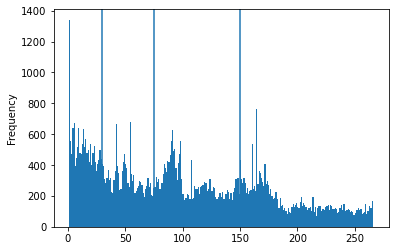

In [23]:
import matplotlib.pyplot as plt
rfm.Recency.plot(kind='hist', bins=260)
plt.axvline(30)
plt.axvline(75)
plt.axvline(150)
plt.show

In [24]:
rfm['r_clust'] = rfm.Recency.apply(lambda x: 'active' if x<=30 else 'warm' if x<=75 else 'cold' if x<=150 else 'inactive')
rfm

,customer_id,Recency,Frequency,Monetary,Clusters,r_clust,rf_clust
0,4a1e06c013a40bf1dda53d60a1a832bc6bc7c163fbe168...,105,1,0.177881,3,cold,Low
1,53699a60c3cd0f444be9f9d859eba9b16d8c1a6778a855...,167,1,0.118542,3,inactive,Low
2,7778717c5641559903e5f66ee3148d03fae4736ba69940...,3,15,1.476237,1,active,Ultra High
3,81da433c5f2a4e01e7d5596dcbb236b1f1a51e4f79ab09...,237,4,0.321966,2,inactive,High
4,47adc32b08d5952d1a929e5a3dd7ac507030b47cd8f7b1...,2,5,0.260864,1,active,Ultra High
...,...,...,...,...,...,...,...
69270,9d148750c78e647618767e5070281fa10de13c6dd13869...,8,1,0.098254,0,active,Common
69271,04080b5938750f1c0d9a09bc285908f387ca1c08d8563d...,140,3,0.416678,2,cold,High
69272,5f4d7907f9384f594c225d1dc79914be443ee56dcce201...,50,4,0.207424,2,warm,High
69273,736d75393a6b29d193ac39b6df5dcd70d7cb516ec3e3d6...,24,3,0.541983,2,active,High


In [25]:
rfm['r_clust'].value_counts(normalize=True)*100

cold        30.760014
inactive    27.393721
active      21.938650
warm        19.907615
Name: r_clust, dtype: float64

In [26]:
counts, bins = np.histogram(rfm.Recency, bins=range(0, 276, 2))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Recency', 'y':'count'},color_discrete_sequence=['indianred'],height=500,width=900)
fig.update_layout(xaxis_title='Recency',yaxis_title='Count',title='Recency Distribution')
fig.add_vline(30, line_dash = 'dash', line_color='blue')
fig.add_vline(75, line_dash = 'dash', line_color='blue')
fig.add_vline(150, line_dash = 'dash', line_color='blue')
fig.add_vrect(x0=0, x1=30, line_width=0, fillcolor="green", opacity=0.1, annotation_text="Active: 31%")
fig.add_vrect(x0=30, x1=75, line_width=0, fillcolor="red", opacity=0.1, annotation_text="Warm: 27%")
fig.add_vrect(x0=75, x1=150, line_width=0, fillcolor="blue", opacity=0.1, annotation_text="Cold: 22%")
fig.add_vrect(x0=150, x1=276, line_width=0, fillcolor="black", opacity=0.1, annotation_text="Inactive: 20%")
fig.show()

In [27]:
i = 'Monetary'

In [28]:
lihat = rfm.groupby('Clusters')[['Recency',	'Frequency', 'Monetary']].mean()[[i]].reset_index()
lihat['Clusters'] = lihat['Clusters'].astype(str)
lihat

,Clusters,Monetary
0,0,0.156025
1,1,1.082578
2,2,0.456294
3,3,0.108568


In [29]:
fig = px.bar(lihat,x='Clusters',y=i,color_discrete_sequence=px.colors.sequential.RdBu,height=400,width=400)
fig.update_layout(yaxis_title=i,title='Rata-rata '+i+' untuk tiap-tiap klaster')
fig.show()

In [30]:
lihat = rfm.groupby('Clusters')[['Recency',	'Frequency', 'Monetary']].mean()[['Frequency']].reset_index()
lihat['Clusters'] = lihat['Clusters'].astype(str)
lihat

fig = px.bar(lihat,x='Clusters',y='Frequency',color_discrete_sequence=px.colors.sequential.RdBu,height=400,width=400)
fig.update_layout(yaxis_title='Frequency',title='Rata-rata Frequency untuk tiap-tiap klaster')
fig.show()

- Klaster 1 : berperan sebagai ultra value customer
- Klaster 2 : berperan sebagai high value customer
- Klaster 0 : berperan sebagai common value customer
- Klaster 3 : berperan sebagai low value customer

In [31]:
rfm['rf_clust'] = rfm.Clusters.apply(lambda x: 'Ultra High' if x==1 else 'High' if x==2 else 'Common' if x==0 else 'Low')
rfm

,customer_id,Recency,Frequency,Monetary,Clusters,r_clust,rf_clust
0,4a1e06c013a40bf1dda53d60a1a832bc6bc7c163fbe168...,105,1,0.177881,3,cold,Low
1,53699a60c3cd0f444be9f9d859eba9b16d8c1a6778a855...,167,1,0.118542,3,inactive,Low
2,7778717c5641559903e5f66ee3148d03fae4736ba69940...,3,15,1.476237,1,active,Ultra High
3,81da433c5f2a4e01e7d5596dcbb236b1f1a51e4f79ab09...,237,4,0.321966,2,inactive,High
4,47adc32b08d5952d1a929e5a3dd7ac507030b47cd8f7b1...,2,5,0.260864,1,active,Ultra High
...,...,...,...,...,...,...,...
69270,9d148750c78e647618767e5070281fa10de13c6dd13869...,8,1,0.098254,0,active,Common
69271,04080b5938750f1c0d9a09bc285908f387ca1c08d8563d...,140,3,0.416678,2,cold,High
69272,5f4d7907f9384f594c225d1dc79914be443ee56dcce201...,50,4,0.207424,2,warm,High
69273,736d75393a6b29d193ac39b6df5dcd70d7cb516ec3e3d6...,24,3,0.541983,2,active,High


In [32]:
a = pd.crosstab(rfm.r_clust, rfm.rf_clust, normalize=True)*100
a = a[['Ultra High', 'High', 'Common', 'Low']]

In [33]:
a = a.reindex(['inactive', 'cold', 'warm', 'active'])

In [34]:
fig = px.imshow(a, text_auto=True, color_continuous_scale='Blues',height=500,width=500)
fig.update_layout(yaxis_title='', xaxis_title='')
fig.show()

## Status Membership

In [35]:
i = 'rf_clust'

In [36]:
buat_pie = rfm[[i]].value_counts().reset_index()
buat_pie

,rf_clust,0
0,Low,32123
1,High,19796
2,Ultra High,8772
3,Common,8584


In [37]:
fig = px.pie(buat_pie,values=0,names=i,title='Customer Segment Percentage',hole=.4,height=500,width=500)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Aliran Dana Berdasar Segment Hasil Clustering

In [38]:
j = 'rf_clust'

In [39]:
buat_pie2 = rfm.groupby(j)[['Monetary']].sum().reset_index()
buat_pie2

,rf_clust,Monetary
0,Common,1339.317542
1,High,9032.794949
2,Low,3487.540831
3,Ultra High,9496.376949


In [40]:
fig = px.pie(buat_pie2,values='Monetary',names=j,title='Total Sales by Segments',hole=.4,height=500,width=500)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [41]:
fig = px.treemap(buat_pie2, path=[j], values='Monetary',height=500,width=500)
fig.update_traces(textinfo='label+value+percent root')
fig.show()

In [42]:
rfm.to_csv('rfm_2020_sample.csv', index=False)

In [43]:
join_2020 = pd.merge(eda,rfm[['customer_id','Clusters', 'r_clust', 'rf_clust']],on='customer_id',how='inner')

In [44]:
pd.read_csv('rfm_2020_sample.csv')

,customer_id,Recency,Frequency,Monetary,Clusters,r_clust,rf_clust
0,4a1e06c013a40bf1dda53d60a1a832bc6bc7c163fbe168...,105,1,0.177881,3,cold,Low
1,53699a60c3cd0f444be9f9d859eba9b16d8c1a6778a855...,167,1,0.118542,3,inactive,Low
2,7778717c5641559903e5f66ee3148d03fae4736ba69940...,3,15,1.476237,1,active,Ultra High
3,81da433c5f2a4e01e7d5596dcbb236b1f1a51e4f79ab09...,237,4,0.321966,2,inactive,High
4,47adc32b08d5952d1a929e5a3dd7ac507030b47cd8f7b1...,2,5,0.260864,1,active,Ultra High
...,...,...,...,...,...,...,...
69270,9d148750c78e647618767e5070281fa10de13c6dd13869...,8,1,0.098254,0,active,Common
69271,04080b5938750f1c0d9a09bc285908f387ca1c08d8563d...,140,3,0.416678,2,cold,High
69272,5f4d7907f9384f594c225d1dc79914be443ee56dcce201...,50,4,0.207424,2,warm,High
69273,736d75393a6b29d193ac39b6df5dcd70d7cb516ec3e3d6...,24,3,0.541983,2,active,High


## Segmentasi Umur

In [45]:
join_2020

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month,Clusters,r_clust,rf_clust
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0,1,1,active,Ultra High
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0,1,1,active,Ultra High
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0,2,1,active,Ultra High
...,...,...,...,...,...,...,...,...,...,...,...
802093,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.033881,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common
802094,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.016932,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common
802095,fc9d03ceb03dc98a075eea543b1871366c7889079db8a9...,2020-09-22,0.038119,Sweater,Ladieswear,ACTIVE,58.0,9,0,active,Common
802096,fd472eb741eb69d3261df85dfa083a899c3bcd18da682b...,2020-09-22,0.050831,Trousers,Ladieswear,ACTIVE,34.0,9,0,active,Common


In [46]:
join_2020['age_segment'] = join_2020.age.apply(lambda x: 'Gen Z' if x<=23 else 'Millenials' if x<=39 else 'Gen X' if x<=55 else 'Baby Boomers' if x<=74 else 'Traditionals')
join_2020

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month,Clusters,r_clust,rf_clust,age_segment
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High,Gen X
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0,1,1,active,Ultra High,Gen X
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0,1,1,active,Ultra High,Gen X
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High,Gen X
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0,2,1,active,Ultra High,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...
802093,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.033881,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common,Millenials
802094,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.016932,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common,Millenials
802095,fc9d03ceb03dc98a075eea543b1871366c7889079db8a9...,2020-09-22,0.038119,Sweater,Ladieswear,ACTIVE,58.0,9,0,active,Common,Baby Boomers
802096,fd472eb741eb69d3261df85dfa083a899c3bcd18da682b...,2020-09-22,0.050831,Trousers,Ladieswear,ACTIVE,34.0,9,0,active,Common,Millenials


In [47]:
buat_age = join_2020.drop_duplicates(subset='customer_id')
buat_age


,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month,Clusters,r_clust,rf_clust,age_segment
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High,Gen X
24,05b6661e851f78bc04ce7bb51a30afeafee0c0d09b4e24...,2020-01-01,0.007525,T-shirt,Divided,ACTIVE,28.0,1,1,active,Ultra High,Millenials
43,06a3f186e4b967cea4ce207c9e50498879afa84a1e6615...,2020-01-01,0.025407,Belt,Ladies Accessories,ACTIVE,32.0,1,2,warm,High,Millenials
71,06bc7ac80f85787c47ac9b04561b924f6f3ec4db5af9c5...,2020-01-01,0.084729,Trousers,Menswear,ACTIVE,47.0,1,2,inactive,High,Gen X
82,08233f3f006087d5ac0b35fa8a3fb93592544a62f1bf66...,2020-01-01,0.016932,Top,Divided,ACTIVE,18.0,1,2,cold,High,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...
802075,f26132ea566e3aac25c89925ba0ad88a34b67545f3c6db...,2020-09-22,0.020322,Trousers,Divided,ACTIVE,30.0,9,0,active,Common,Millenials
802092,f7bf03638fdd0961d6484a903fca9c0ad6118f66061021...,2020-09-22,0.050831,Sneakers,"Children Accessories, Swimwear",ACTIVE,50.0,9,0,active,Common,Gen X
802093,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.033881,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common,Millenials
802095,fc9d03ceb03dc98a075eea543b1871366c7889079db8a9...,2020-09-22,0.038119,Sweater,Ladieswear,ACTIVE,58.0,9,0,active,Common,Baby Boomers


In [48]:
buat_age[(buat_age.r_clust=='active')&(buat_age.rf_clust=='Ultra High')].age_segment.value_counts()

Millenials      3748
Gen X           2159
Gen Z           1517
Baby Boomers     835
Traditionals      36
Name: age_segment, dtype: int64

In [49]:
buat_age[(buat_age.rf_clust=='Ultra High')].age_segment.value_counts()

Millenials      3978
Gen X           2292
Gen Z           1583
Baby Boomers     879
Traditionals      40
Name: age_segment, dtype: int64

In [50]:
i = 'active'

In [51]:
buat_age[(buat_age.r_clust==i)].age_segment.value_counts().reset_index()

,index,age_segment
0,Millenials,6413
1,Gen X,3775
2,Gen Z,3385
3,Baby Boomers,1523
4,Traditionals,102


In [52]:
buat_age['age_segment'].value_counts().reset_index()

,index,age_segment
0,Millenials,28140
1,Gen Z,16910
2,Gen X,16900
3,Baby Boomers,6705
4,Traditionals,620


## Produk Sesuai Segmentasi Usia

In [56]:
join_2020

,customer_id,t_dat,price,product_type_name,index_name,club_member_status,age,month,Clusters,r_clust,rf_clust,age_segment
0,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Leggings/Tights,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High,Gen X
1,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-01,0.016932,Scarf,Ladies Accessories,ACTIVE,50.0,1,1,active,Ultra High,Gen X
2,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.042356,Sweater,Divided,ACTIVE,50.0,1,1,active,Ultra High,Gen X
3,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-01-23,0.050831,Dress,Ladieswear,ACTIVE,50.0,1,1,active,Ultra High,Gen X
4,04ee918eea3ce72c06565e6206c52e18a64c9288a79b69...,2020-02-04,0.050831,Dress,Ladieswear,ACTIVE,50.0,2,1,active,Ultra High,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...
802093,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.033881,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common,Millenials
802094,fc4f60bcf5fec5567e798b9151a2c1d05aeb1463046de2...,2020-09-22,0.016932,Blouse,Ladieswear,ACTIVE,31.0,9,0,active,Common,Millenials
802095,fc9d03ceb03dc98a075eea543b1871366c7889079db8a9...,2020-09-22,0.038119,Sweater,Ladieswear,ACTIVE,58.0,9,0,active,Common,Baby Boomers
802096,fd472eb741eb69d3261df85dfa083a899c3bcd18da682b...,2020-09-22,0.050831,Trousers,Ladieswear,ACTIVE,34.0,9,0,active,Common,Millenials


In [61]:
join_2020.age_segment.unique().tolist()

['Gen X', 'Millenials', 'Gen Z', 'Baby Boomers', 'Traditionals']

In [71]:
join_2020[join_2020.age_segment=='Gen X'].product_type_name.value_counts().reset_index().head(10)

,index,product_type_name
0,Trousers,29577
1,Dress,28653
2,T-shirt,13367
3,Shorts,9816
4,Sweater,9697
5,Vest top,9663
6,Top,9391
7,Bikini top,9073
8,Blouse,9040
9,Swimwear bottom,8822


In [72]:
join_2020[join_2020.age_segment=='Millenials'].product_type_name.value_counts().reset_index().head(10)

,index,product_type_name
0,Dress,52688
1,Trousers,49881
2,T-shirt,26375
3,Vest top,20797
4,Bikini top,19885
5,Bra,19742
6,Top,19091
7,Swimwear bottom,18390
8,Sweater,18351
9,Blouse,15212


In [73]:
join_2020[join_2020.age_segment=='Gen Z'].product_type_name.value_counts().reset_index().head(10)

,index,product_type_name
0,Trousers,17795
1,Dress,15056
2,Bikini top,11300
3,T-shirt,9944
4,Swimwear bottom,9892
5,Bra,8690
6,Vest top,7553
7,Top,7017
8,Sweater,6266
9,Shorts,6235


In [74]:
join_2020[join_2020.age_segment=='Baby Boomers'].product_type_name.value_counts().reset_index().head(10)

,index,product_type_name
0,Trousers,11250
1,Dress,10075
2,T-shirt,4000
3,Sweater,3700
4,Blouse,3638
5,Top,3228
6,Vest top,2707
7,Shirt,2109
8,Skirt,1971
9,Shorts,1969


In [75]:
join_2020[join_2020.age_segment=='Traditionals'].product_type_name.value_counts().reset_index().head(10)

,index,product_type_name
0,Trousers,570
1,Dress,517
2,T-shirt,310
3,Sweater,252
4,Vest top,215
5,Blouse,196
6,Top,182
7,Bra,157
8,Shorts,156
9,Skirt,126
